<a href="https://colab.research.google.com/github/alooperalta/movieRecommendation/blob/master/movie_recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recommender Systems with Python

Here we have developed a movie recommender using **Python** and **pandas**.


Let's get started!

##Importing Libraries

In [ ]:
import pandas as pd

## Get data

Getting movie ratings

In [ ]:
movie_ratings = pd.read_csv('/content/ml-latest-small/ratings.csv')
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Getting movie titles

In [ ]:
movie_titles = pd.read_csv('/content/ml-latest-small/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies = pd.DataFrame(movie_titles, columns=['movieId', 'title'])
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
movies_list = pd.merge(movie_ratings, movies, on='movieId')
movies_list.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [ ]:
movies_list.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [ ]:
movies_list.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [ ]:
ratings = pd.DataFrame(movies_list.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [ ]:
ratings['rating count'] = pd.DataFrame(movies_list.groupby('title')['rating'].count())
ratings.head()

,rating,rating count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


**Histograms**

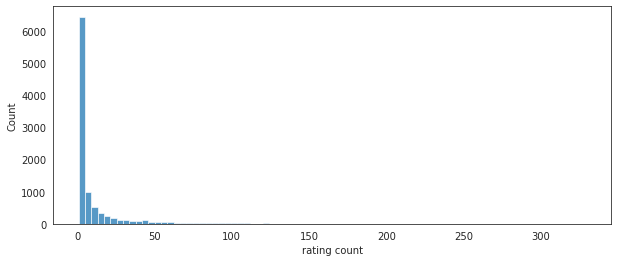

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(ratings['rating count'], bins=80)
plt.show()

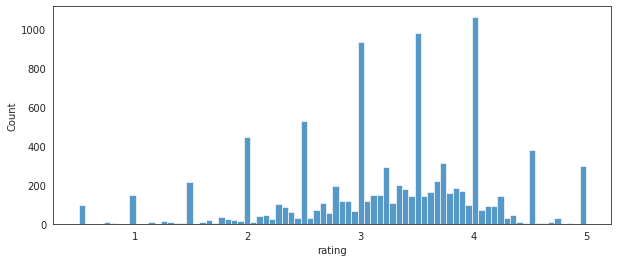

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(ratings['rating'], bins=80)
plt.show()

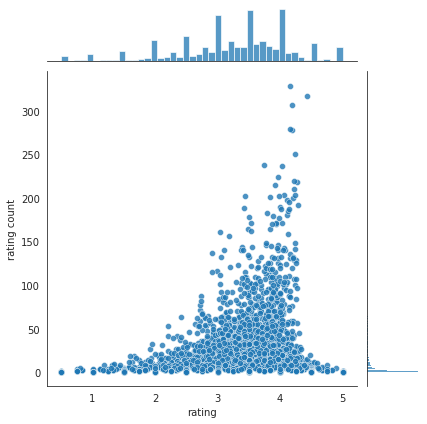

In [ ]:
sns.jointplot(x='rating', y='rating count', data=ratings, alpha=0.8)
plt.show()

## Recommending Similar Movies

In [ ]:
movie_matrix = movies_list.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.sort_values('rating count',ascending=False).head(10)

,rating,rating count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


**Selecting three movies as sample**
- Shawshank Redemption
- Matrix
- Jurassic Park

### Shawshank Redemption

In [ ]:
data_shawshank = movie_matrix['Shawshank Redemption, The (1994)']
data_shawshank.head()

userId
1    NaN
2    3.0
3    NaN
4    NaN
5    3.0
Name: Shawshank Redemption, The (1994), dtype: float64

In [ ]:
similar_shawshank = movie_matrix.corrwith(data_shawshank)
corr_shawshank = pd.DataFrame(similar_shawshank, columns=['Correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.419543
(500) Days of Summer (2009),0.249580
*batteries not included (1987),0.404520
...And Justice for All (1979),-1.000000
10 Cloverfield Lane (2016),0.145671


In [ ]:
corr_shawshank.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Principal, The (1987)",1.0
Chi-Raq (2015),1.0
Rififi (Du rififi chez les hommes) (1955),1.0
Robot & Frank (2012),1.0
Rock Star (2001),1.0
Catch a Fire (2006),1.0
"Cat in the Hat, The (2003)",1.0
Cars 2 (2011),1.0
Runaway (1984),1.0


**Observation**

We see that many movies correlate perfectly. The main reason for this is that such movies have very low number of ratings. So we add a criteria for recommending a movie that it must have atleast 100 ratings

In [ ]:
corr_shawshank = corr_shawshank.join(ratings['rating count'])
corr_shawshank.head()

,Correlation,rating count
title,,
"'burbs, The (1989)",0.419543,17
(500) Days of Summer (2009),0.249580,42
*batteries not included (1987),0.404520,7
...And Justice for All (1979),-1.000000,3
10 Cloverfield Lane (2016),0.145671,14


In [ ]:
corr_shawshank[corr_shawshank['rating count']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating count
title,,
"Shawshank Redemption, The (1994)",1.000000,317
Four Weddings and a Funeral (1994),0.446212,103
Schindler's List (1993),0.402202,220
"Usual Suspects, The (1995)",0.394294,204
Ocean's Eleven (2001),0.391546,119


### The Matrix

In [ ]:
data_matrix = movie_matrix['Matrix, The (1999)']

similar_matrix = movie_matrix.corrwith(data_matrix)
corr_matrix = pd.DataFrame(similar_matrix, columns=['Correlation'])
corr_matrix.dropna(inplace=True)

corr_matrix = corr_matrix.join(ratings['rating count'])
corr_matrix[corr_matrix['rating count']>100].sort_values('Correlation', ascending=False).head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,rating count
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126


### Jurassic Park

In [ ]:
data_jurrasic = movie_matrix['Jurassic Park (1993)']

similar_jurrasic = movie_matrix.corrwith(data_jurrasic)
corr_jurrasic = pd.DataFrame(similar_jurrasic, columns=['Correlation'])
corr_jurrasic.dropna(inplace=True)

corr_jurrasic = corr_jurrasic.join(ratings['rating count'])
corr_jurrasic[corr_jurrasic['rating count']>100].sort_values('Correlation', ascending=False).head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,rating count
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108


In [ ]:
recommend_jurassic = corr_jurrasic[corr_jurrasic['rating count']>100].sort_values('Correlation', ascending=False)
movies_name = recommend_jurassic.index
movies_corr = recommend_jurassic['Correlation']

print('Recommendations: ')
for x in range(1, 6):
  print((movies_name[x] + '\t\t' + str(round(movies_corr[x]*100, 2)) + '% Match').rjust(75))

Recommendations: 
                                              Outbreak (1995)		53.38% Match
                   Ghostbusters (a.k.a. Ghost Busters) (1984)		52.23% Match
                                         Fugitive, The (1993)		46.06% Match
                  Indiana Jones and the Temple of Doom (1984)		45.65% Match
                                   Mission: Impossible (1996)		45.19% Match
